In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
# # Dit df omzetten naar een csv:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html?highlight=csv#pandas.DataFrame.to_csv
# # pd.healthData.to_csv(healthDataCsv)
# healthData.to_csv('healthData.csv')
# healthData.to_csv('healthDataOrig.csv')

In [3]:
#Read csv file

healthData = pd.read_csv('healthData.csv')


## Betekenis van de data: 

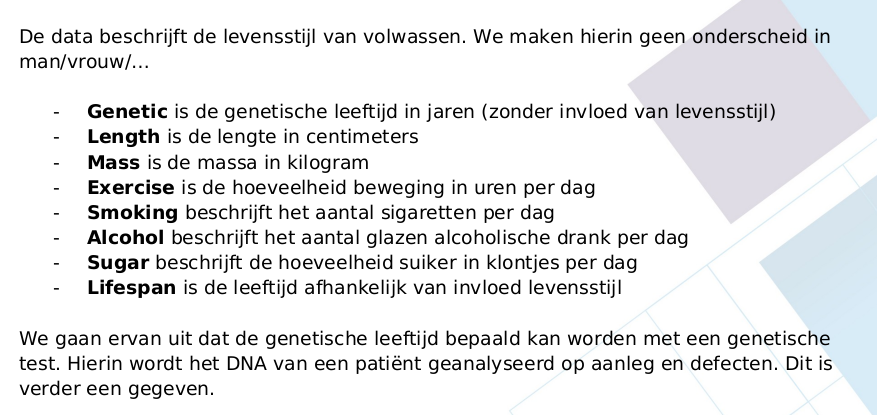

## Exploratory Data Analysis

In [4]:
healthData.head()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,84.0,180.0,90.0,2.0,9.0,1.0,2,86
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100
2,84.0,174.0,74.0,3.0,20.0,3.0,2,87
3,84.0,187.0,78.0,2.0,6.0,5.0,3,91
4,84.0,187.0,89.0,2.0,12.0,0.0,2,83


In [5]:
healthData.tail()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
8187,82.0,185.0,67.0,3.0,11.0,8.0,2,90
8188,82.0,183.0,72.0,2.0,1.0,5.0,4,88
8189,83.0,192.0,92.0,1.0,22.0,2.0,4,62
8190,81.0,175.0,60.0,3.0,13.0,7.0,2,93
8191,83.0,204.0,76.0,3.0,8.0,8.0,1,96


In [6]:
healthData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   8191 non-null   float64
 1   length    8190 non-null   float64
 2   mass      8191 non-null   float64
 3   exercise  8191 non-null   float64
 4   smoking   8191 non-null   float64
 5   alcohol   8191 non-null   float64
 6   sugar     8192 non-null   int64  
 7   lifespan  8192 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 512.1 KB


Just wondering: is it useful to work with floats since it looks like all the data are given in 'whole' numbers (' integers'). On the other hand: does it really hurt the performance?

In [7]:
healthData.describe()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
count,8191.000000,8190.000000,8191.000000,8191.000000,8191.000000,8191.000000,8192.000000,8192.000000
mean,79.967770,183.642735,79.794286,1.617141,9.773776,5.748260,2.423340,76.096069
std,1.634992,12.600441,12.076801,0.830975,6.967164,2.664489,0.950095,10.918167
min,76.000000,154.000000,60.000000,0.000000,0.000000,0.000000,1.000000,40.000000
25%,79.000000,174.000000,70.000000,1.000000,3.000000,4.000000,2.000000,68.000000
50%,80.000000,183.000000,79.000000,1.000000,10.000000,6.000000,2.000000,76.000000
75%,81.000000,193.000000,88.000000,2.000000,16.000000,8.000000,3.000000,83.000000
max,84.000000,214.000000,112.000000,4.000000,22.000000,10.000000,5.000000,113.000000


In [8]:
duplicate_rows_healthData = healthData[healthData.duplicated()]
print("number of duplicate rows: ", duplicate_rows_healthData.shape)
# Conclusion: no duplicate rows

number of duplicate rows:  (0, 8)


In [9]:
# noLength = healthData['length'].isna()
# onlyNoLength = healthData[healthData['length'].isna() == True]
# display(onlyNoLength)

### Observations:
- only 'sugar' and 'lifespan' have no NaNs. All other columns have 1 or 2 Nans. So if I would just drop all rows with missing values I would throw away a maximum of 7 rows on a df which has almost 8200 rows. That is not a significant amount of rows.
- 'genetic' age lies between 76 and 84 years. This seems quite normal.
- 'length' min: 154 cm, max: 214 cm. 214 cm is very tall, but not impossible (acromegaly). Are there many entries over 200 cm?
- 'mass' min: 60 kg, max: 112 kg.does not seem to be extreme. I am surprised that the min and max values are not more extreme. On the other hand: how much does the person with the length of 214 cm weigh? 
- 'exercise' between min: 0 hours, max: 4 hours per day. Seems normal.
- 'smoking' : min: 0 en max: 22 cigarettes per day. 
- 'alcohol': min: 0 en max: 10 glasses per day.
- 'sugar' intake per day: min:1,  max: 5 lumps per day.
- lifespan:  min: 40 years, max: 113 years. The max lifespan seems quite old, but is not unheard of. Maybe someone who lived a very healthy life? How many people over 100 years of age does this population have?
- Would it be useful to create a column 'bmi'?

## Discarding data

In [10]:
# Drop all rows with missing values: 
healthData = healthData.dropna()
display(healthData.info())
# New df has 8185 rows. Apparently there were 7 rows with missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8185 entries, 0 to 8191
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   8185 non-null   float64
 1   length    8185 non-null   float64
 2   mass      8185 non-null   float64
 3   exercise  8185 non-null   float64
 4   smoking   8185 non-null   float64
 5   alcohol   8185 non-null   float64
 6   sugar     8185 non-null   int64  
 7   lifespan  8185 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 575.5 KB


None

## Inspecting the variables, looking for outliers
Boxplots and scatterplots


### Genetic

<AxesSubplot: xlabel='genetic'>

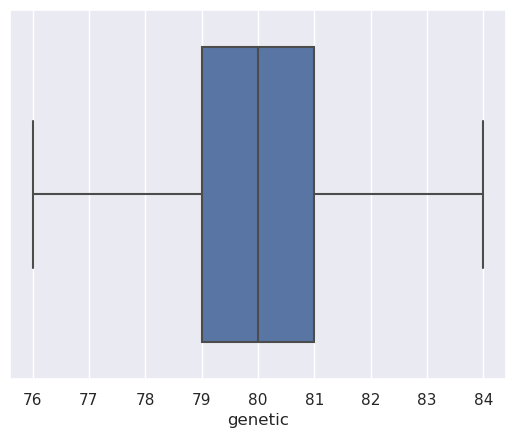

In [11]:
# Boxplot 'genetic'
sns.boxplot(x=healthData['genetic'])

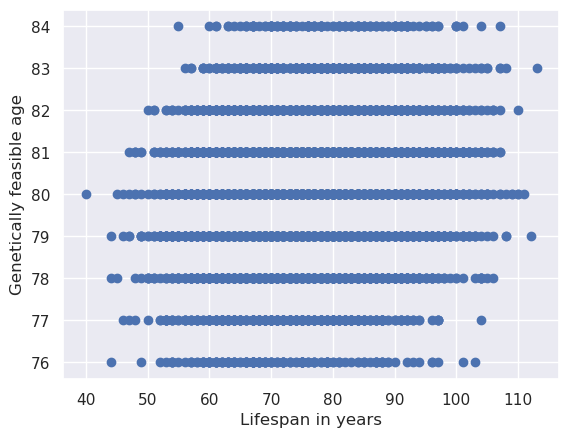

In [12]:
#scatterplot lifespan on the X-axis and genetic on the y-axis
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
# matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
#matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
x= healthData['lifespan']
y = healthData['genetic']
xlabel = plt.xlabel('Lifespan in years')
ylabel = plt.ylabel('Genetically feasible age')
display(plt.scatter(x, y))


Genetically people should be able to live at least 76 years.  
The visualisation shows that people's life expectancy begins to decline as early as around 45.  
People who have a higher life expectancy from a genetic point of view also seem to have a higher (predicted) lifespan.


### Length

In [13]:
overTwoMtrs = healthData.query("length > 200") 
display(overTwoMtrs)
# Apparently there are 827 entries of persons who are over 2 mtrs tall

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100
11,84.0,204.0,74.0,2.0,15.0,10.0,2,81
27,84.0,208.0,95.0,1.0,17.0,1.0,2,76
54,84.0,213.0,73.0,1.0,6.0,4.0,4,83
58,84.0,201.0,69.0,3.0,5.0,3.0,2,107
...,...,...,...,...,...,...,...,...
8143,80.0,202.0,96.0,3.0,18.0,4.0,2,88
8150,80.0,208.0,85.0,1.0,9.0,7.0,3,70
8165,78.0,214.0,63.0,1.0,13.0,9.0,2,67
8175,78.0,210.0,109.0,3.0,9.0,8.0,3,80


In [46]:
# over210cms = healthData.query("length > 210") 
# display(over210cms)

#healthDataOver210 = healthData.loc[healthData['length'] > 210]
#healthDataOver210.shape
# Apparently there are 105 entries of persons who are over 210 cms tall

(105, 9)

In [15]:
exact214cms = healthData.query("length == 214") 
#display(exact214cms)
amountEx214cms = exact214cms.count()
display(amountEx214cms)

# Apparently there are 24 persons who are exactly 214 cms tall - so being that tall isn't that exceptional

genetic     24
length      24
mass        24
exercise    24
smoking     24
alcohol     24
sugar       24
lifespan    24
dtype: int64

<AxesSubplot: xlabel='length'>

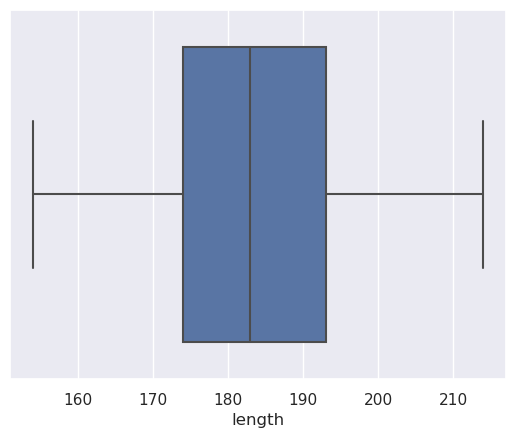

In [16]:
# Boxplot 'length'
sns.boxplot(x=healthData['length'])

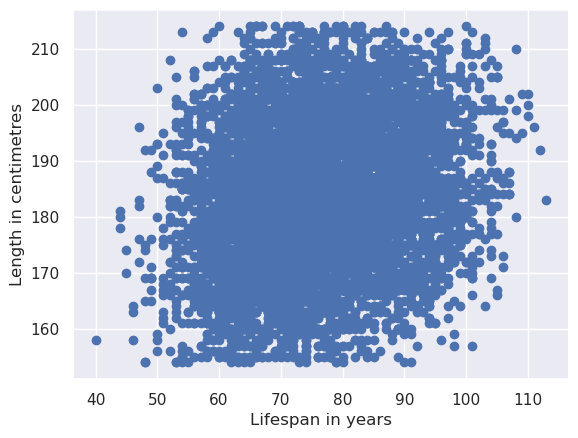

In [17]:
x= healthData['lifespan']
y = healthData['length']
xlabel = plt.xlabel('Lifespan in years')
ylabel = plt.ylabel('Length in centimetres')
display(plt.scatter(x, y))

From this visualisation, I conclude that 'length' and (expected) lifespan have little correlation.

### Mass

<AxesSubplot: xlabel='mass'>

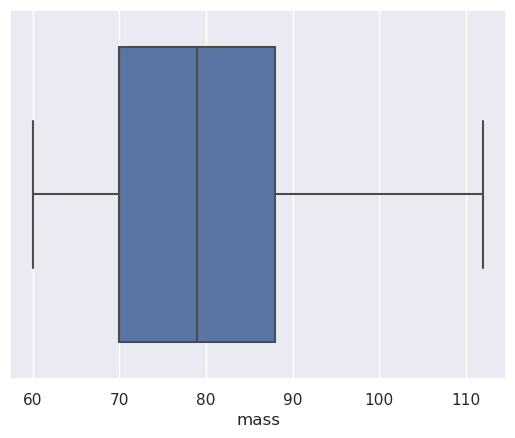

In [18]:
# Boxplot 'mass'
sns.boxplot(x=healthData['mass'])

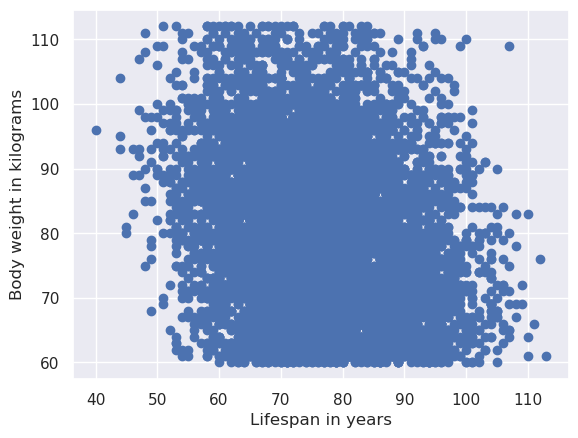

In [19]:
x= healthData['lifespan']
y = healthData['mass']
xlabel = plt.xlabel('Lifespan in years')
ylabel = plt.ylabel('Body weight in kilograms')
display(plt.scatter(x, y))

From this visualisation, I conclude that body weight and (expected) lifespan show a slightly negative correlation (the higher the body weight the lower the lifespan).

### Exercise

<AxesSubplot: xlabel='exercise'>

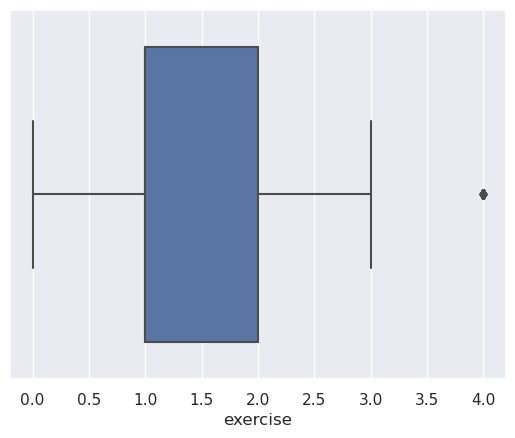

In [20]:
# Boxplot 'exercise'
sns.boxplot(x=healthData['exercise'])

In [49]:
# So there may be an exercise-outlier here
# overThreeHrsEx = healthData.query("exercise > 3.0") 
# display(overThreeHrsEx)
# amountOverThreeHrsEx = overThreeHrsEx.count()
# display(amountOverThreeHrsEx)

overThreeHrsEx  = healthData.loc[healthData['exercise'] > 3]
overThreeHrsEx.shape

# Apparently there are 86 persons that exercise over 3 hrs per day

(86, 9)

Would it be a good thing to remove these entries from the df? How extreme did these people really sport? Compared to 3 hrs per day, 4 hrs does not sound that extreme to me (like 10 hrs would).  
What if these 4-hr sporters have a really nice lifespan compared to 'less active sporters' ??


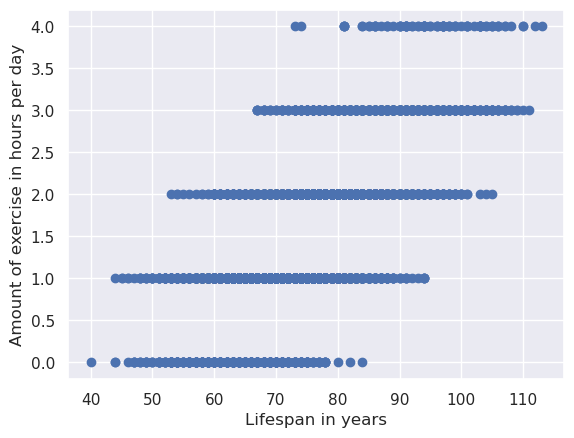

In [22]:
x = healthData['lifespan']
y = healthData['exercise']
xlabel = plt.xlabel('Lifespan in years')
ylabel = plt.ylabel('Amount of exercise in hours per day')
display(plt.scatter(x, y))

It does look like those who exercise more hours per day live longer lives. The difference between 3 or 4 hours in relation to lifespan doesn't seem to Ibe that significant. Just wondering: how many of the active people do also smoke? I expect 'low active people' to smoke more sigarettes than those who work out 4 hrs per day. ( I don't expect them to smoke at all.)

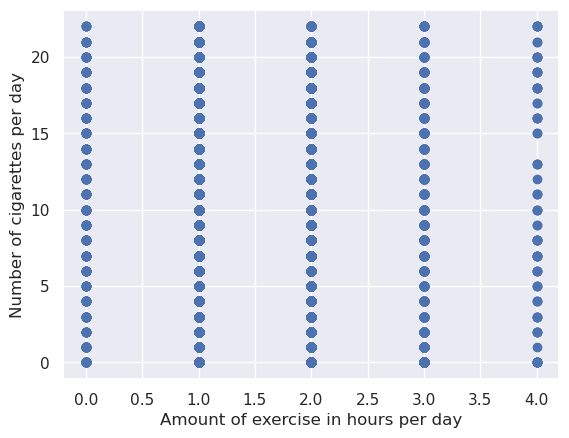

In [23]:
x = healthData['exercise']
y = healthData['smoking']
xlabel = plt.xlabel('Amount of exercise in hours per day')
ylabel = plt.ylabel('Number of cigarettes per day')
display(plt.scatter(x, y))

In [60]:
# Exercise over 3 hrs and smoking > 10:
# smokingSporters = healthData.query('exercise > 3.0 and smoking > 10')
# smokingSporters.shape
# 38 people exercise more than 3 hrs per day AND smoke more than 10 cigarettes per day

heaSmokSport = healthData.query('exercise > 3.0 and smoking == 22')
heaSmokSport.shape
# 6 people exercise more than 3 hrs per day AND smoke 22 cigarettes per day

(6, 9)

I was not expecting this.  
Apparently, there are heavy smokers in every sporting group.

### Smoking

<AxesSubplot: xlabel='smoking'>

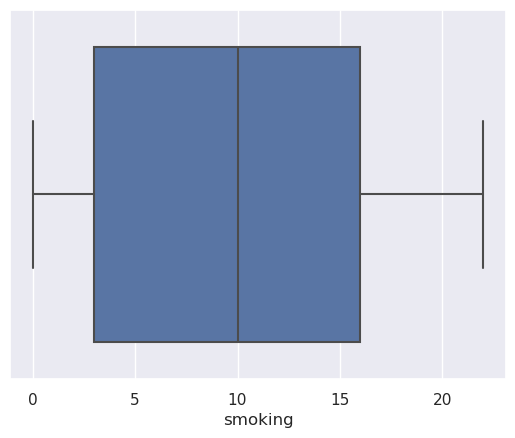

In [24]:
# Boxplot 'smoking'
sns.boxplot(x=healthData['smoking'])
# No outliers

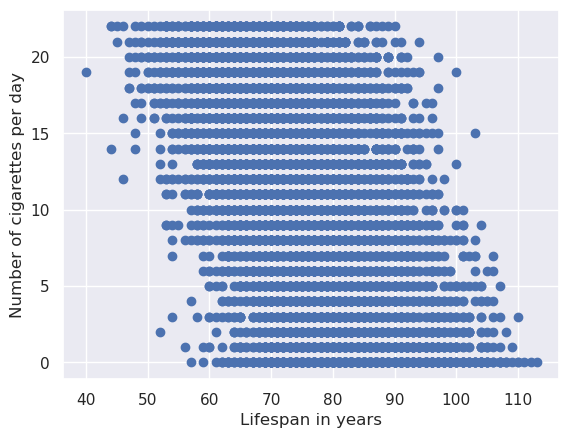

In [25]:
x = healthData['lifespan']
y = healthData['smoking']
xlabel = plt.xlabel('Lifespan in years')
ylabel = plt.ylabel('Number of cigarettes per day')
display(plt.scatter(x, y))

No surprise here really: those who smoke a lot tend to die earlier than those who smoke less or not at all. 

### Sugar

<AxesSubplot: xlabel='sugar'>

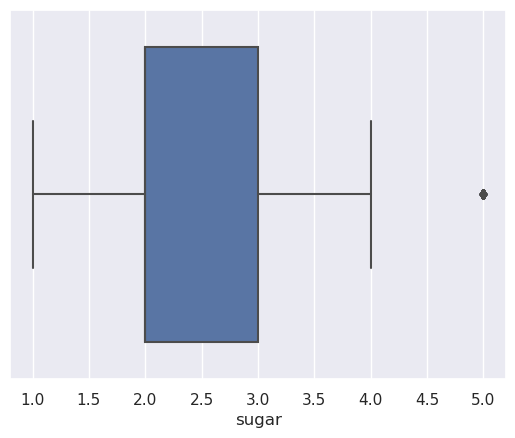

In [26]:
# Boxplot 'sugar'
sns.boxplot(x=healthData['sugar'])

In [27]:
# So there may be sugar-outliers here
overFourSugar = healthData.query("sugar >= 4") 
#display(overFourSugar)
amountOverFourSugar = overFourSugar.count()
display(amountOverFourSugar)
# Apparently there are 1072 persons who take over 4 lumps of sugar every day

genetic     1072
length      1072
mass        1072
exercise    1072
smoking     1072
alcohol     1072
sugar       1072
lifespan    1072
dtype: int64

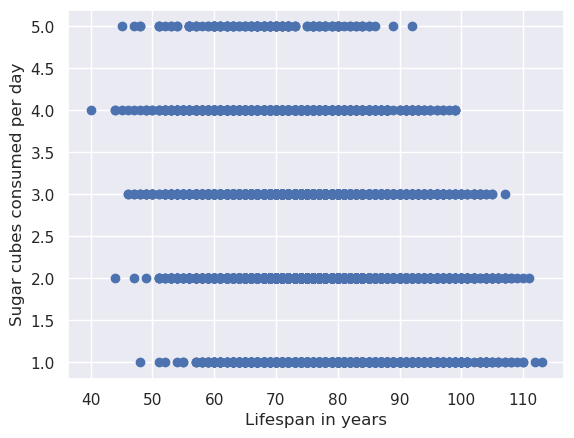

In [28]:
x = healthData['lifespan']
y = healthData['sugar']
xlabel = plt.xlabel('Lifespan in years')
ylabel = plt.ylabel('Sugar cubes consumed per day')
display(plt.scatter(x, y))

People's life expectancy decreases as they eat more sugar cubes per day.  
People who eat the equivalent of 5 sugar cubes a day typically have a lifespan lower than 90.  
In the group of people who eat 3 or more sugar cubes a day, mortality starts to occur as early as the mid-40s.  
While in the group of people who eat 2 sugar cubes or less a day, this does not happen until their (mid) 50s.

### Lifespan

<AxesSubplot: xlabel='lifespan'>

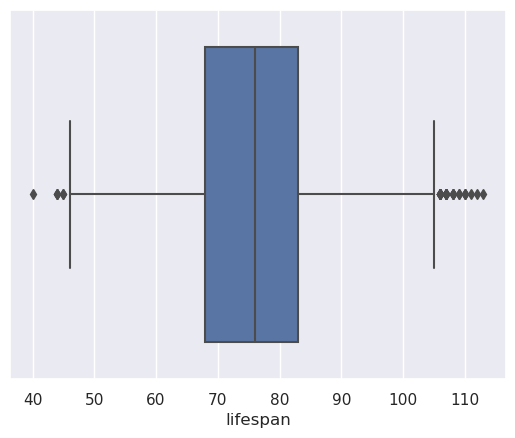

In [29]:
# Boxplot 'lifespan'
sns.boxplot(x=healthData['lifespan'])
# There may be outliers here

In [80]:
# So there may be lifespan-outliers here (Age limits chosen on sight.)

# smokingSporters = healthData.query('exercise > 3.0 and smoking > 10')
# smokingSporters.shape
lifespOutl = healthData.query('lifespan <= 46' and 'lifespan >= 104') 
display(lifespOutl.shape)

# Apparently in this population there were a total of 64 people with a lifespan'46 or younger' or ' 104 or older'.

yLifespOutl = healthData.query('lifespan <= 46') 
display(yLifespOutl.shape)
# Apparently in this population there were 9 people with a lifespan'46 or younger'
display(healthData.columns)
# Strange how I already have a column 'bmi' while it is only created further down the notebook??

(64, 9)

(9, 9)

Index(['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar',
       'lifespan', 'bmi'],
      dtype='object')

## Heatmap
Before deciding whether or not to discard of the outliers I'd like to see the heatmap.


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
genetic,1.000000,-0.002151,-0.010059,0.004464,-0.011032,0.003612,-0.006626,0.152144
length,-0.002151,1.000000,0.017750,-0.007252,-0.008966,0.006750,-0.015262,0.179911
mass,-0.010059,0.017750,1.000000,0.004304,0.016148,-0.002182,0.006780,-0.201487
exercise,0.004464,-0.007252,0.004304,1.000000,-0.012758,0.005955,-0.009249,0.677365
smoking,-0.011032,-0.008966,0.016148,-0.012758,1.000000,0.001413,-0.001368,-0.525613
alcohol,0.003612,0.006750,-0.002182,0.005955,0.001413,1.000000,0.013864,-0.216818
sugar,-0.006626,-0.015262,0.006780,-0.009249,-0.001368,0.013864,1.000000,-0.263895
lifespan,0.152144,0.179911,-0.201487,0.677365,-0.525613,-0.216818,-0.263895,1.000000


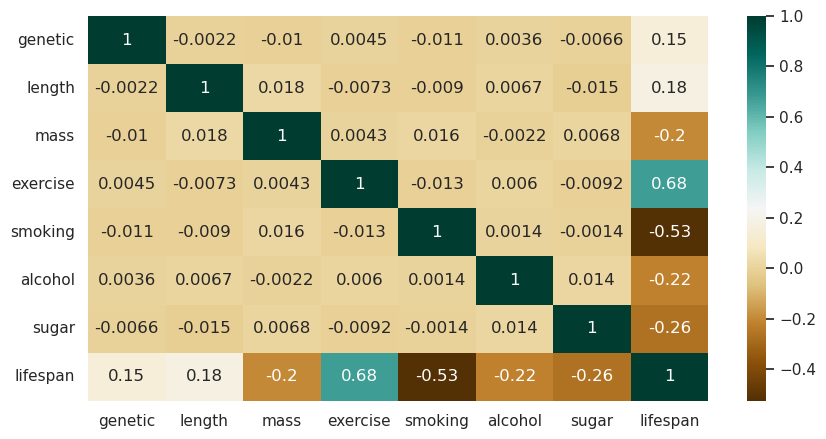

In [31]:
plt.figure(figsize=(10,5))
c= healthData.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

## First conclusions
It looks like exercise has a huge positive influence on lifespan, while smoking has a (lesser) negative influence on lifespan.  
Less important than smoking, but still important: a negative correlation between lifespan and sugarconsumption, alcoholconsumption and mass.  
It seems that Lifestyle-choices are more important than (given factors like) genetics or length.  
Nb: 'exercise' and 'sugar', aswell as 'lifespan' seem to have 'outliers'.


## New Dataframe without the outliers

In [32]:
Q1 = healthData.quantile(0.25)
Q3 = healthData.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print()
print(Q3)
print()
print(IQR)
healthDataNoOutl = healthData[~((healthData < (Q1 - 1.5 * IQR)) |(healthData > (Q3 + 1.5 * IQR))).any(axis=1)]
healthDataNoOutl.info()

genetic      79.0
length      174.0
mass         70.0
exercise      1.0
smoking       3.0
alcohol       4.0
sugar         2.0
lifespan     68.0
Name: 0.25, dtype: float64

genetic      81.0
length      193.0
mass         88.0
exercise      2.0
smoking      16.0
alcohol       8.0
sugar         3.0
lifespan     83.0
Name: 0.75, dtype: float64

genetic      2.0
length      19.0
mass        18.0
exercise     1.0
smoking     13.0
alcohol      4.0
sugar        1.0
lifespan    15.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 8191
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   7948 non-null   float64
 1   length    7948 non-null   float64
 2   mass      7948 non-null   float64
 3   exercise  7948 non-null   float64
 4   smoking   7948 non-null   float64
 5   alcohol   7948 non-null   float64
 6   sugar     7948 non-null   int64  
 7   lifespan  7948 non-null   int64  
dtypes: f

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
genetic,1.000000,-0.005661,-0.009111,0.003265,-0.009462,0.004965,-0.004766,0.153073
length,-0.005661,1.000000,0.022425,-0.008460,-0.004785,0.008196,-0.013823,0.179178
mass,-0.009111,0.022425,1.000000,0.005708,0.011893,-0.002841,-0.000208,-0.200942
exercise,0.003265,-0.008460,0.005708,1.000000,-0.008494,0.008715,0.002287,0.664784
smoking,-0.009462,-0.004785,0.011893,-0.008494,1.000000,-0.003578,-0.005384,-0.532308
alcohol,0.004965,0.008196,-0.002841,0.008715,-0.003578,1.000000,0.007558,-0.216189
sugar,-0.004766,-0.013823,-0.000208,0.002287,-0.005384,0.007558,1.000000,-0.245873
lifespan,0.153073,0.179178,-0.200942,0.664784,-0.532308,-0.216189,-0.245873,1.000000


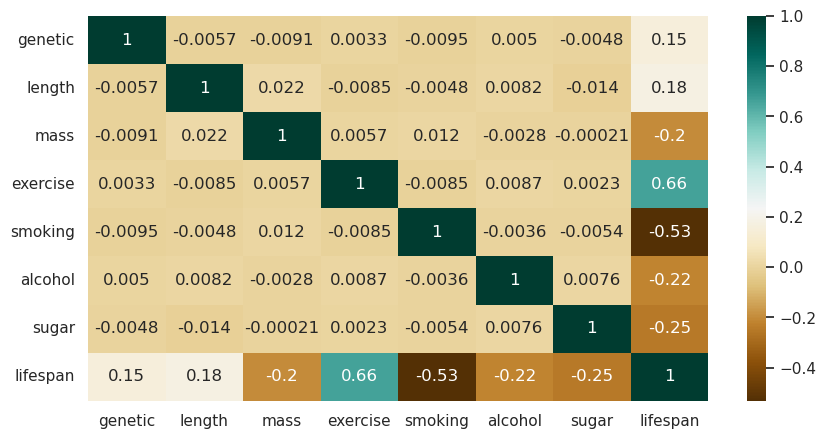

In [33]:
plt.figure(figsize=(10,5))
c= healthDataNoOutl.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

All true outliers have been removed from the data frame.  
What is left of the original group of people who became 'under 46' and 'over 104'?

In [79]:

# Are there still lifespan-outliers here ?(Age limits chosen on sight.)
lifespOutlNoOutl = healthDataNoOutl.query("lifespan <= 46" and "lifespan >= 104") 
display(lifespOutlNoOutl.shape)

# Apparently in this population there are still a total of 30 people (out of 64) with a lifespan of'46 or younger' or ' 104 or older'.
negLifespOutlNoOutl = healthDataNoOutl.query("lifespan <= 46") 
# amountNegLifespOutlNoOutl = negLifespOutlNoOutl.count()
display(negLifespOutlNoOutl.shape)
# Apparently in this new population there are still 3 (out of 9) people  with a lifespan'46 or younger' when they died.

(30, 8)

(3, 8)

## BMI column calculated on original dataframe (with outliers)

### What is a healthy BMI?
BMI gives an estimate of how healthy your body weight is. You can calculate BMI for women, men and children from 2 years of age.  

BMI is less suitable if you are very muscular, pregnant, breastfeeding or of Asian descent.  
*Note:* we have no information about the different races in our population.  
For adults, a healthy BMI is between 18.5 and 25. But this does not apply to everyone.  
For the elderly and children, different limits for underweight, overweight and healthy weight apply. 

### Outcome BMI from 70 years of age

There are no official cut-off points for BMI for people aged 70 and over. In the BMI meter, we have assumed BMI limits for underweight, healthy weight and (severe) overweight to be higher than 19-69. This is due to the risk of disease.  
This is because elderly people are only at higher risk of disease at a BMI score of 28 or higher, and are already at higher risk of malnutrition at a BMI score lower than 22.

More info on: https://www.voedingscentrum.nl/bmi

In [35]:
#BMI-column in orig df (with outliers), rounded to 0 marks behind the '.' 

healthData['bmi'] = round(healthData['mass']/((healthData['length']**2)*0.0001))
display(healthData.head())

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi
0,84.0,180.0,90.0,2.0,9.0,1.0,2,86,28.0
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100,19.0
2,84.0,174.0,74.0,3.0,20.0,3.0,2,87,24.0
3,84.0,187.0,78.0,2.0,6.0,5.0,3,91,22.0
4,84.0,187.0,89.0,2.0,12.0,0.0,2,83,25.0


<AxesSubplot: xlabel='bmi'>

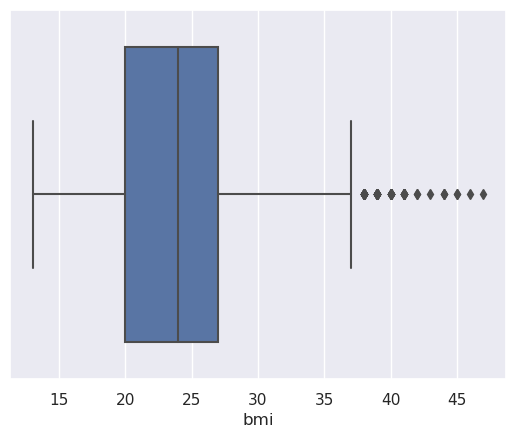

In [36]:
# Boxplot 'bmi'
sns.boxplot(x=healthData['bmi'])
# There may be outliers here

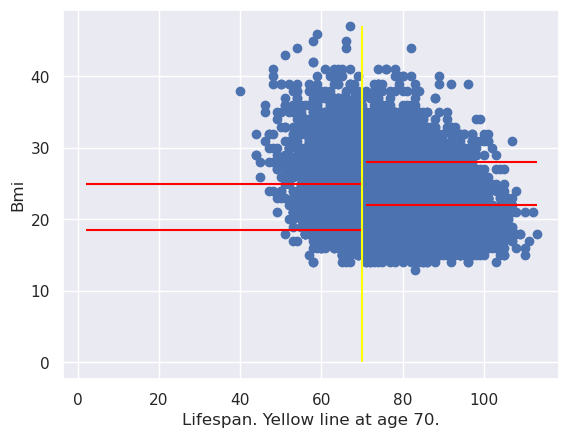

In [37]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hlines.html
# matplotlib.pyplot.hlines(y, xmin, xmax, colors=None, linestyles='solid', label='', *, data=None, **kwargs)
x = healthData['lifespan']
y = healthData['bmi']
color1 = ['red']
color2 = ['yellow']
minBmi = plt.hlines(18.5, xmin = 2, xmax = 70, colors = color1)
maxBmi = plt.hlines(25, xmin = 2, xmax = 70, colors = color1)
minBmiEld = plt.hlines(22, xmin = 71, xmax = 113, colors = color1)
maxBmiEld= plt.hlines(28, xmin = 71, xmax = 113, colors = color1)
age70 = plt.vlines(70, ymin = 0, ymax = 47, colors = color2)
xlabel = plt.xlabel('Lifespan. Yellow line at age 70.')
ylabel = plt.ylabel('Bmi')
display(plt.scatter(x, y))

I placed a yellow line at 70.  
It strikes me (by eye) that in the group 70 years and above, the BMI of a sizable proportion of people is either too high or too low.  
Over 70 years of age a too low bmi seems to be common, but it does not seem to affect the calculated lifespan as a bmi which is too high.

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi
genetic,1.000000,-0.002151,-0.010059,0.004464,-0.011032,0.003612,-0.006626,0.152144,-0.007815
length,-0.002151,1.000000,0.017750,-0.007252,-0.008966,0.006750,-0.015262,0.179911,-0.658872
mass,-0.010059,0.017750,1.000000,0.004304,0.016148,-0.002182,0.006780,-0.201487,0.726374
exercise,0.004464,-0.007252,0.004304,1.000000,-0.012758,0.005955,-0.009249,0.677365,0.005736
smoking,-0.011032,-0.008966,0.016148,-0.012758,1.000000,0.001413,-0.001368,-0.525613,0.019794
alcohol,0.003612,0.006750,-0.002182,0.005955,0.001413,1.000000,0.013864,-0.216818,-0.006283
sugar,-0.006626,-0.015262,0.006780,-0.009249,-0.001368,0.013864,1.000000,-0.263895,0.013077
lifespan,0.152144,0.179911,-0.201487,0.677365,-0.525613,-0.216818,-0.263895,1.000000,-0.276206
bmi,-0.007815,-0.658872,0.726374,0.005736,0.019794,-0.006283,0.013077,-0.276206,1.000000


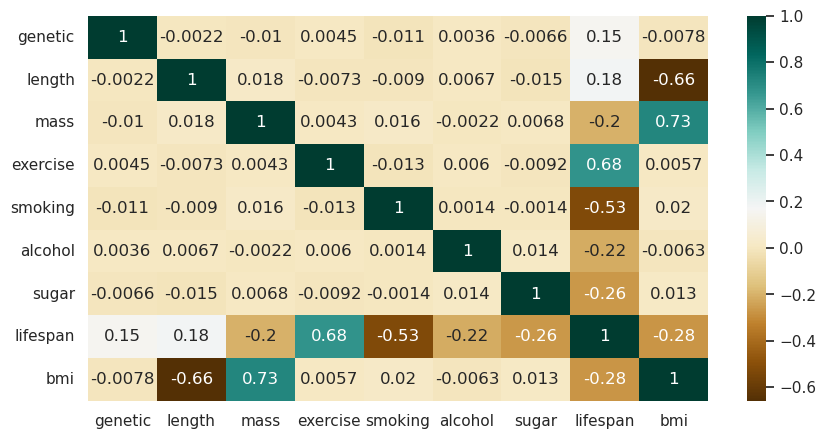

In [38]:
plt.figure(figsize=(10,5))
c= healthData.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c